In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
import os
import PIL.Image as Image
from typing import Tuple
from LookGenerator.networks.segmentation import UNet, train_unet
from LookGenerator.networks.utils import load_model
import cv2
from LookGenerator.datasets.utils import prepare_image_for_model_transpose, to_array_from_model_bin_transpose
import LookGenerator.datasets.transforms as custom_transforms

In [2]:
image = Image.open(r"C:\Users\DenisovDmitrii\Desktop\train\image2\00000_00.jpg")
img_to_model = prepare_image_for_model_transpose(image)

In [3]:
transform_output = transforms.Compose([
    transforms.Resize((192, 256)),
    custom_transforms.MinMaxScale(),
    custom_transforms.ThresholdTransform(threshold=0.5)
])
model = UNet(in_channels=3, out_channels = 1)

In [4]:
model = load_model(model,
                       r"C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session22\unet_epoch_199_6.139310116233932e-05.pt")
modelled = model(img_to_model)

torch.Size([1, 1, 192, 256])
torch.Size([1, 3, 192, 256])


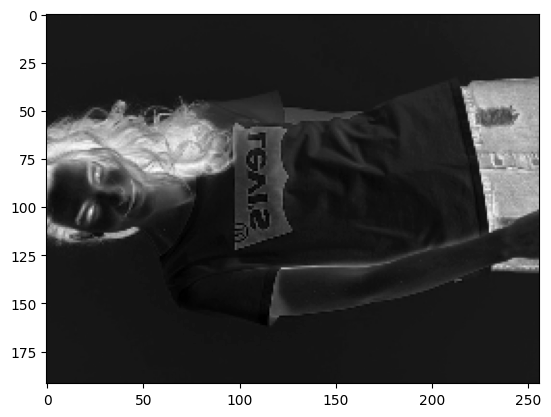

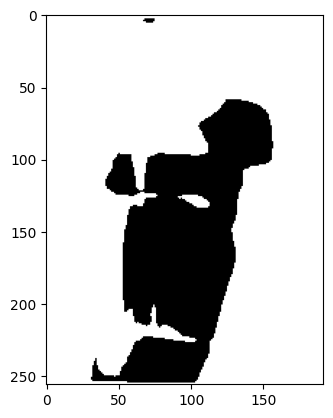

In [6]:
print(modelled.shape)
print(img_to_model.shape)
plt.imshow(img_to_model.detach().numpy()[0,0,:,:], cmap = 'binary')
plt.show()
modelled_img = to_array_from_model_bin_transpose(transform_output(modelled.detach()))

plt.imshow(modelled_img,cmap = 'binary')
plt.show()

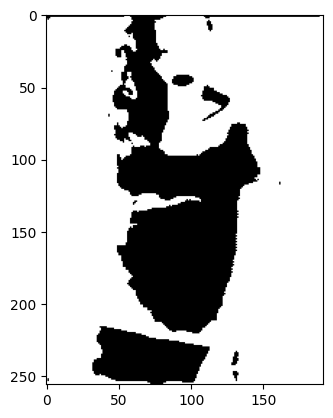

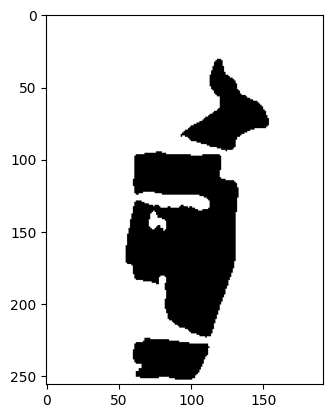

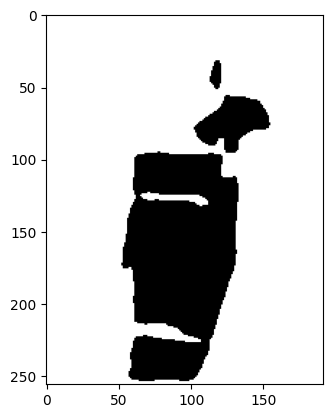

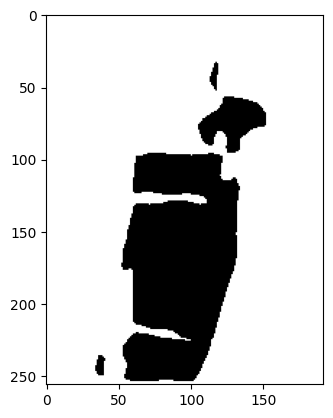

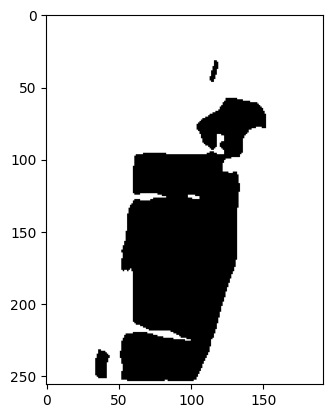

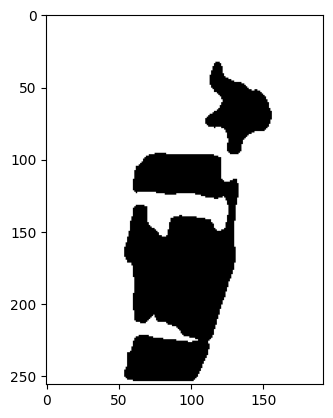

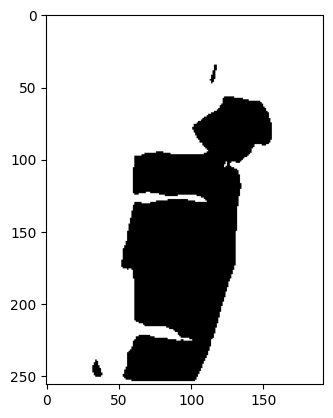

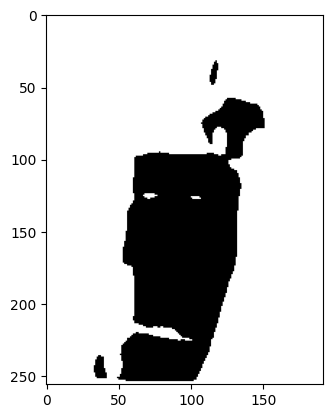

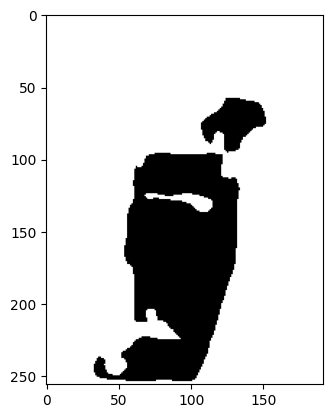

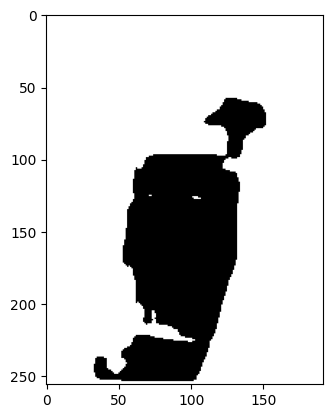

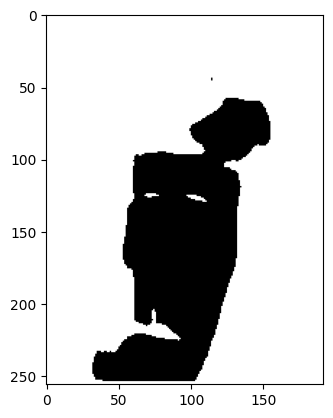

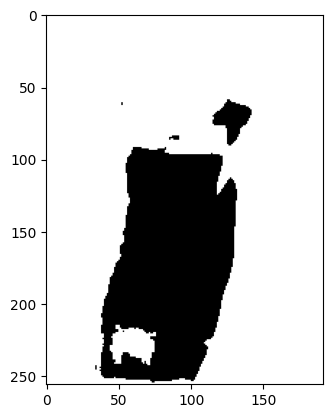

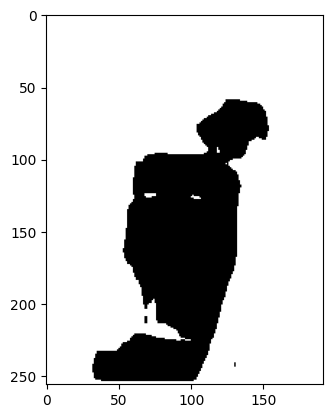

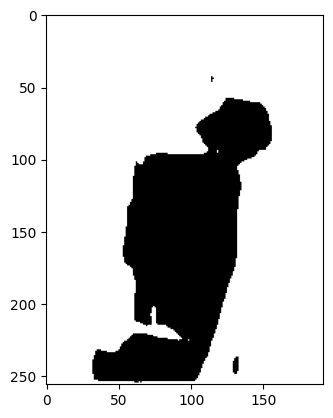

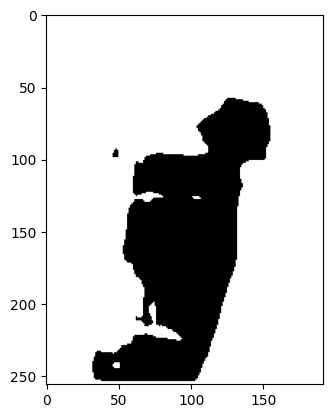

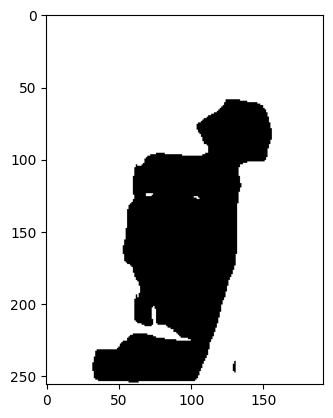

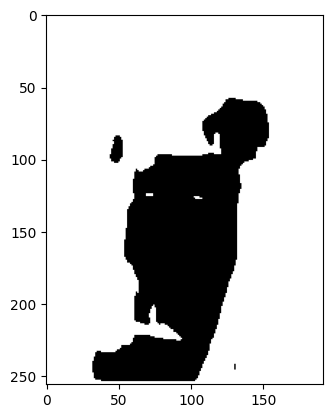

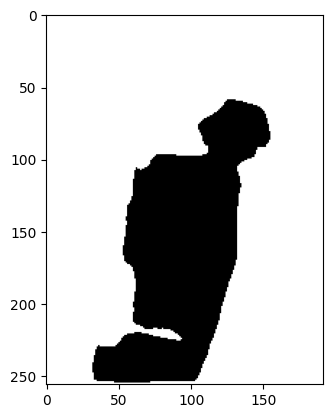

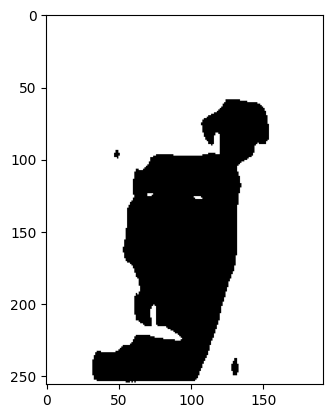

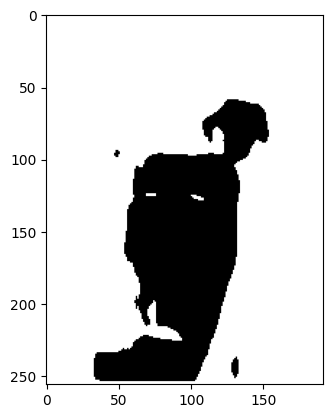

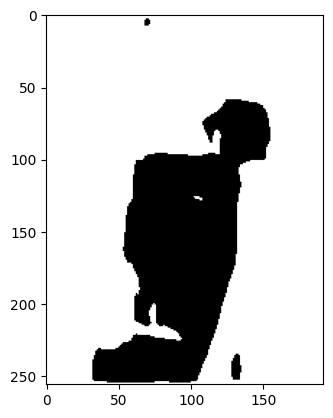

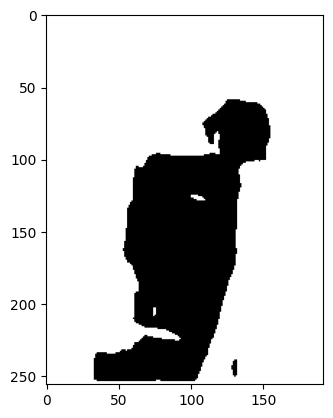

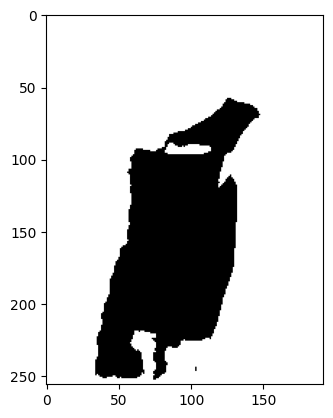

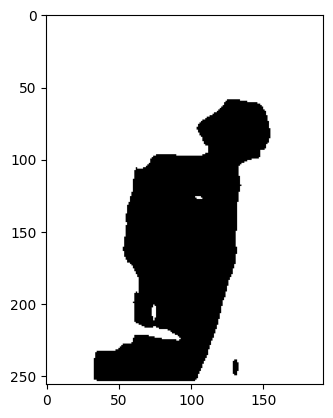

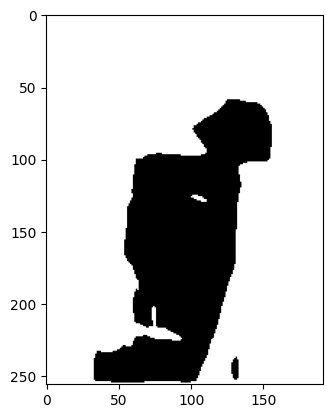

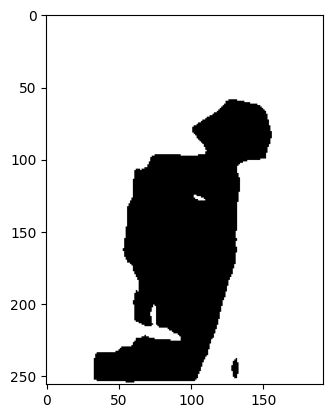

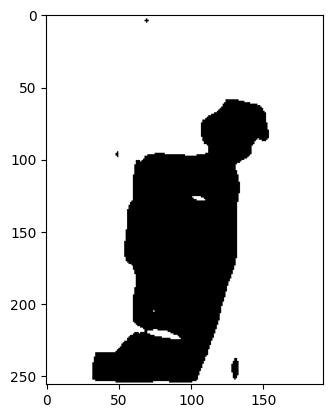

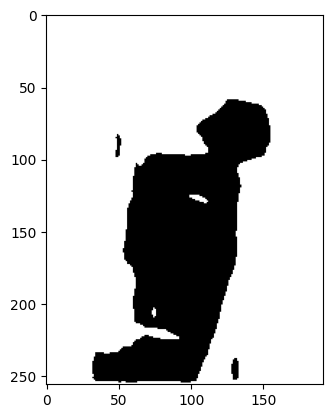

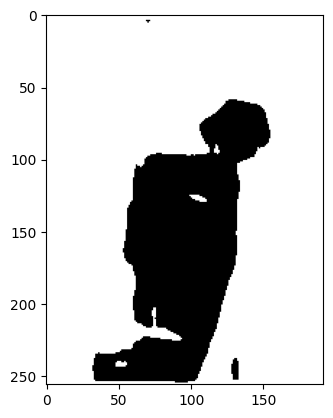

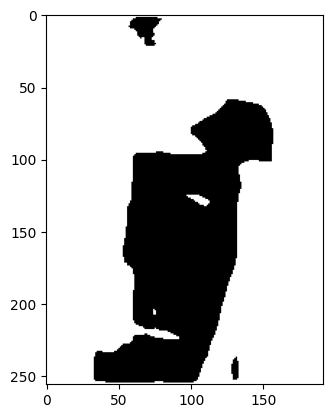

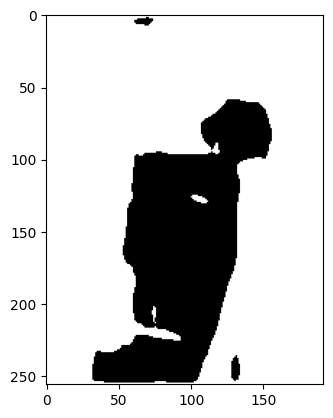

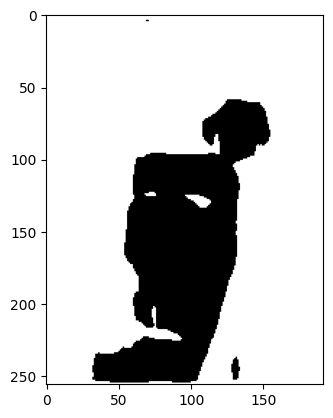

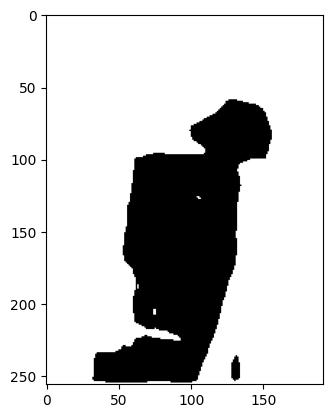

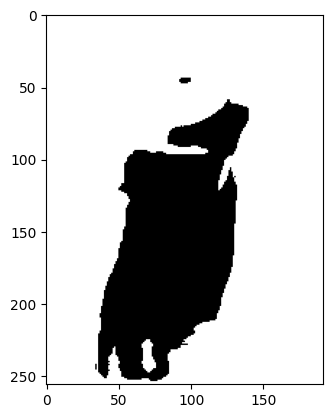

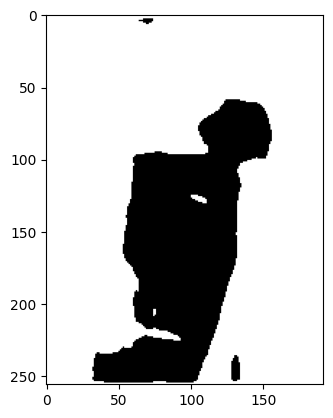

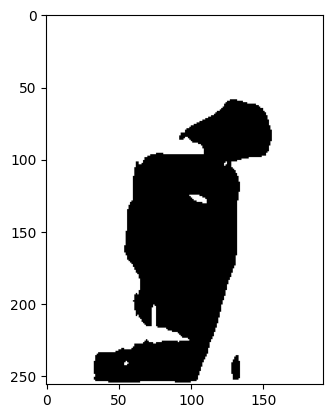

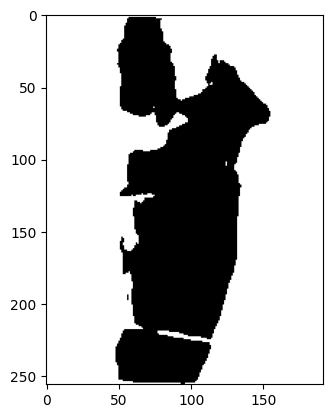

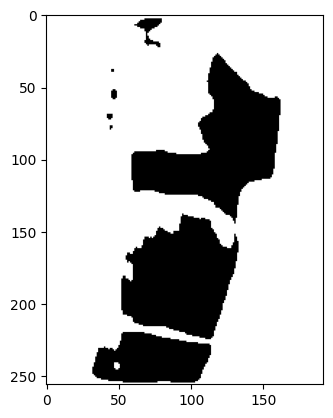

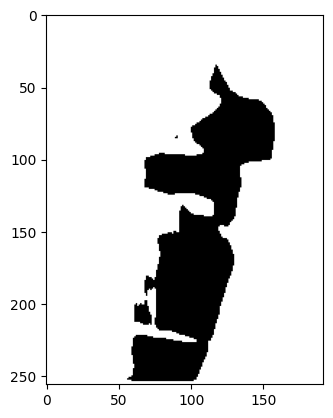

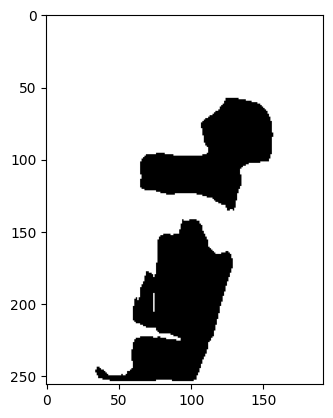

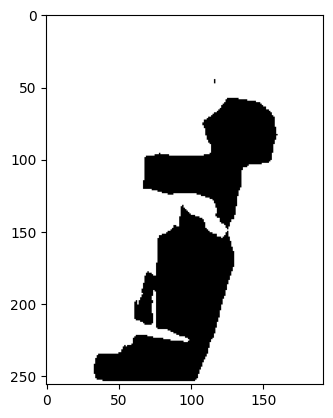

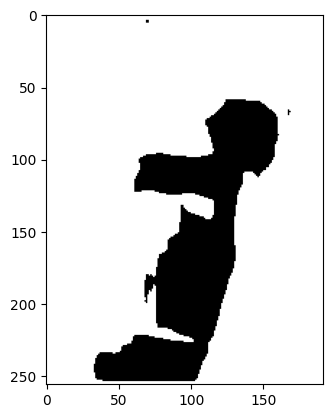

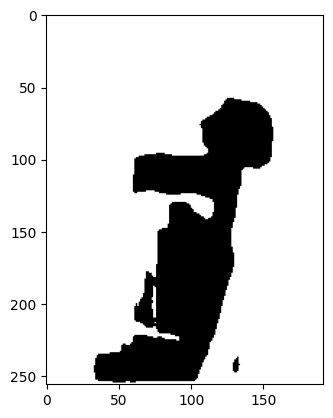

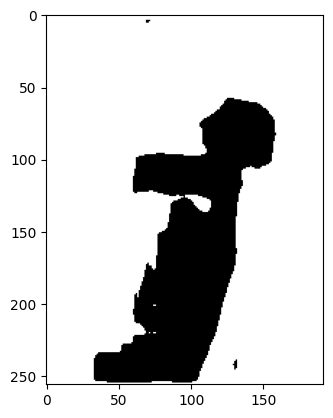

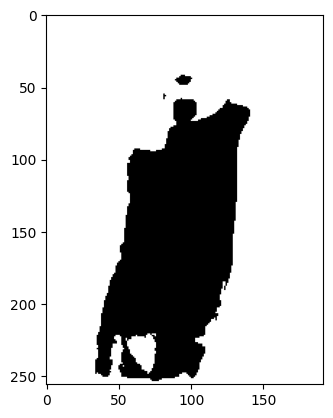

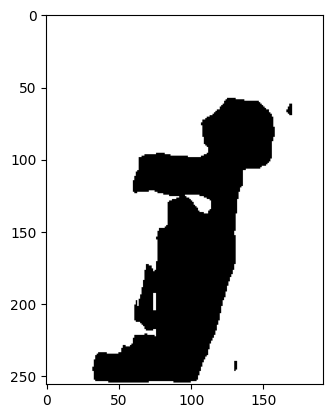

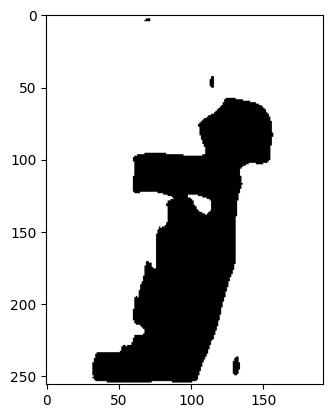

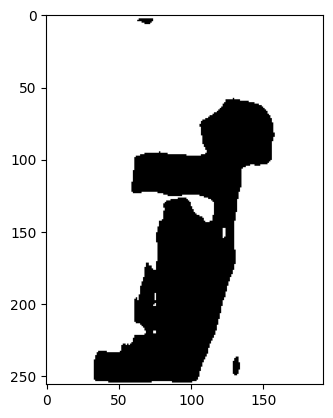

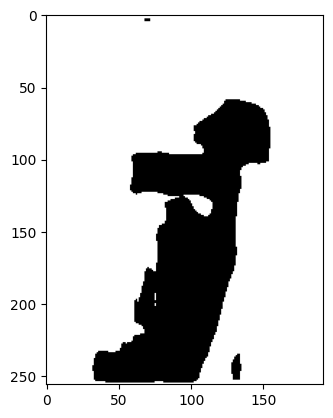

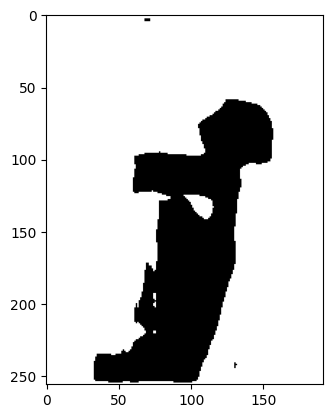

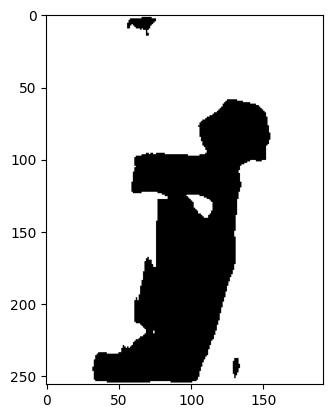

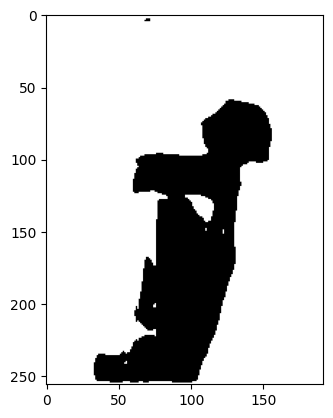

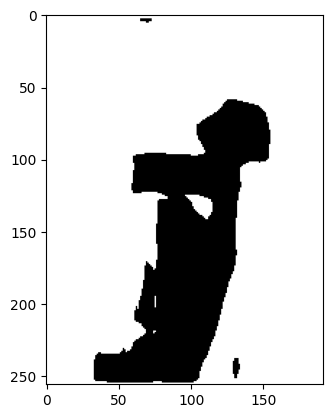

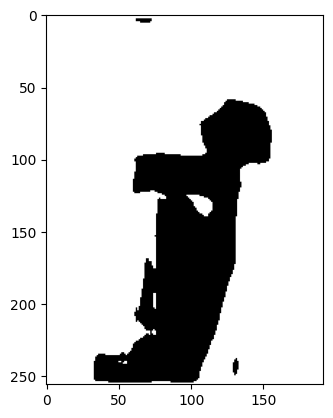

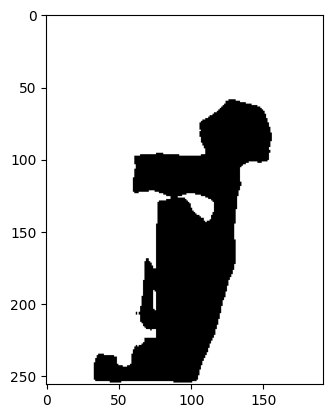

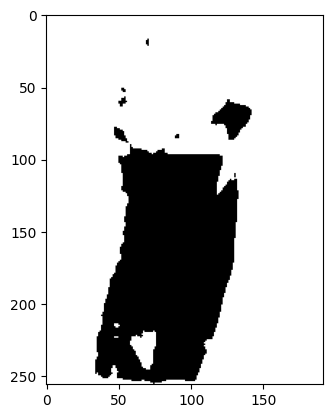

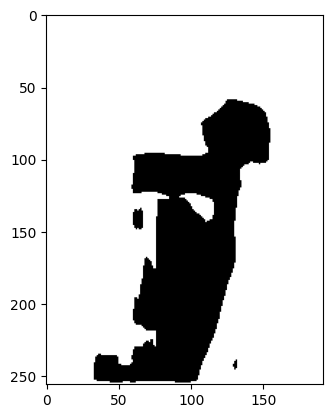

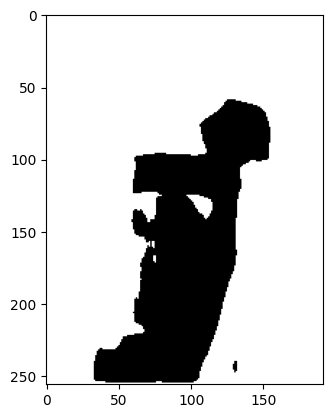

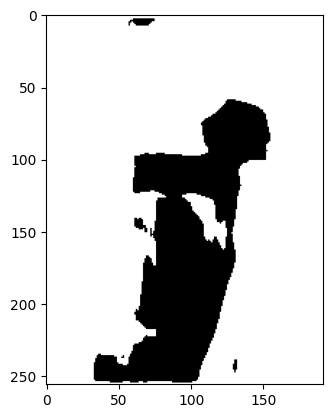

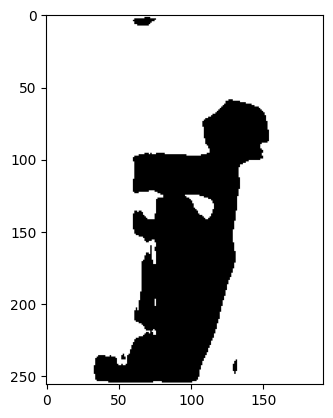

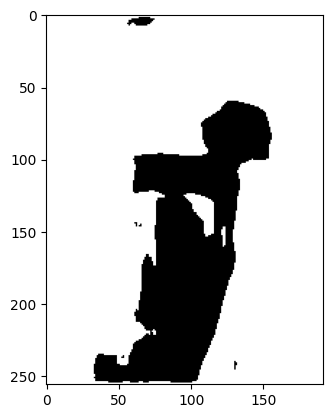

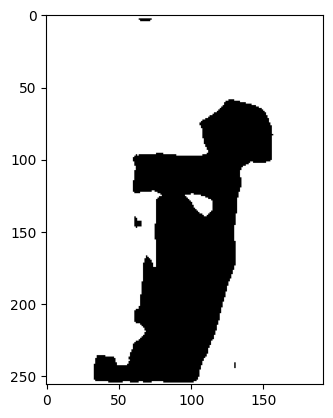

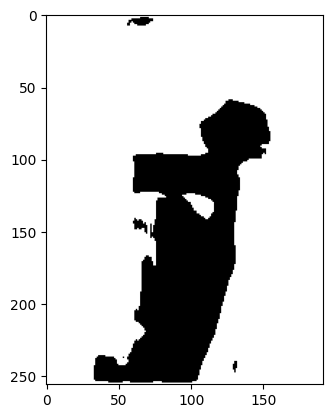

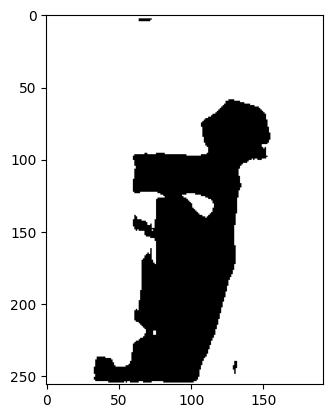

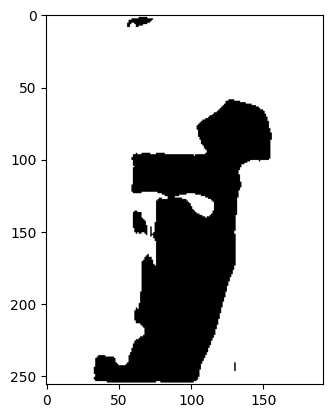

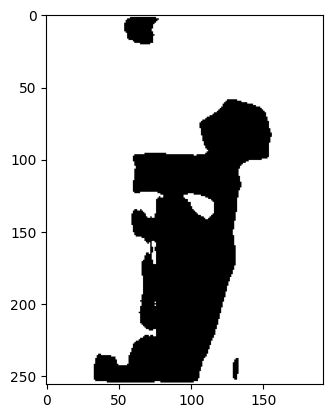

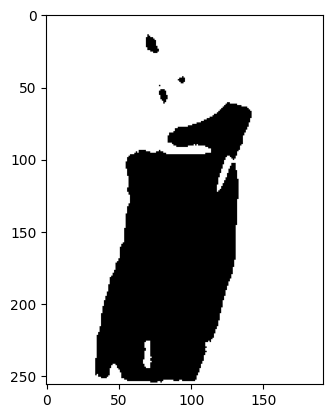

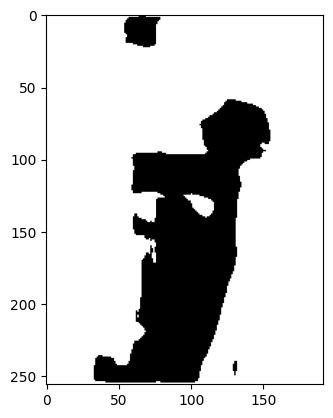

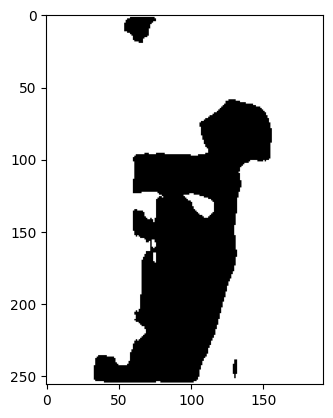

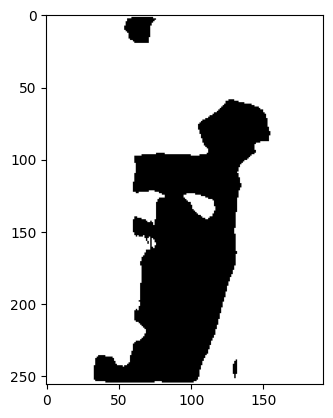

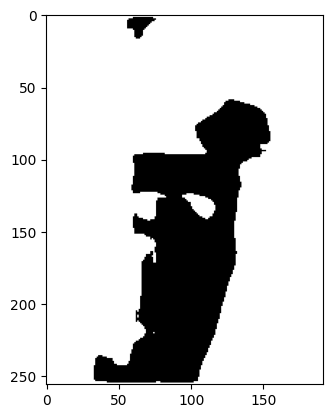

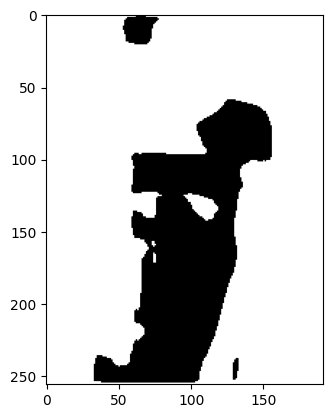

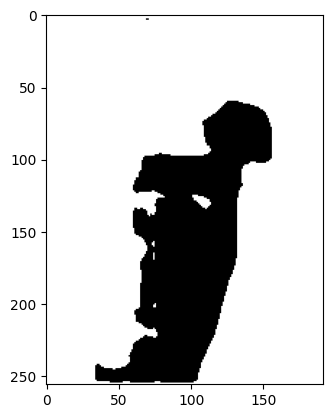

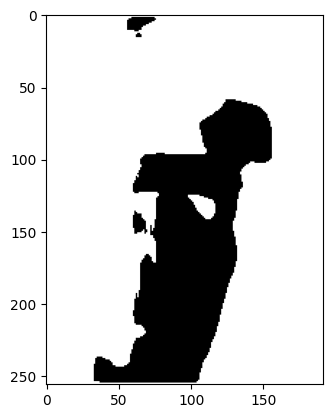

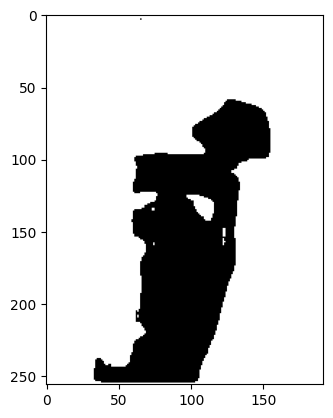

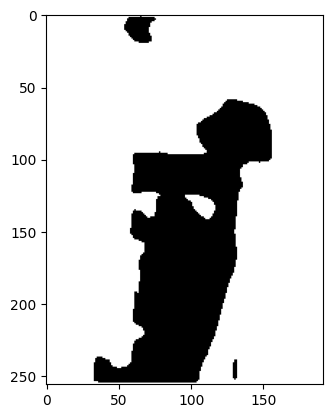

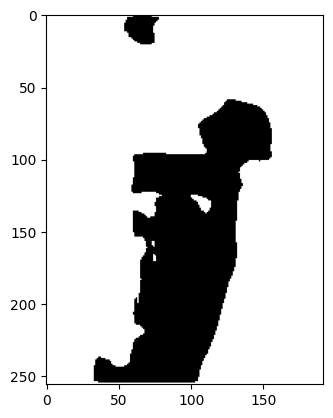

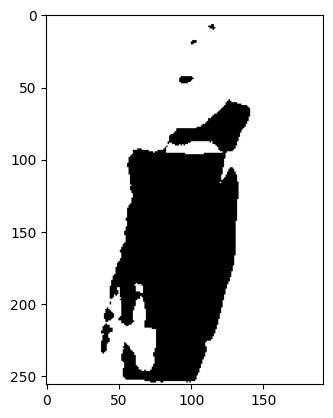

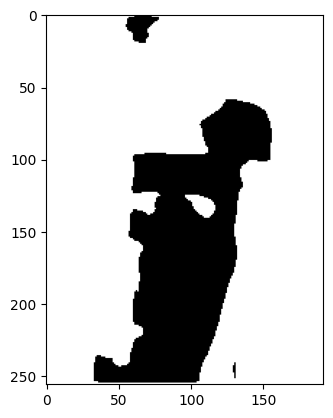

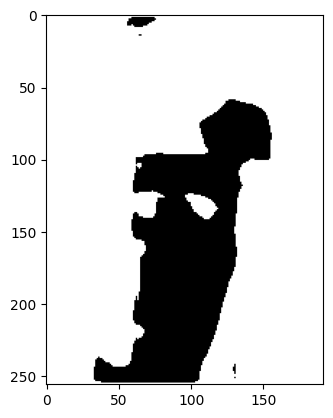

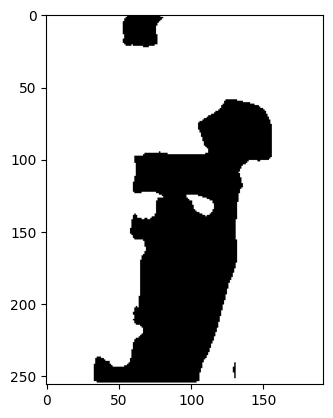

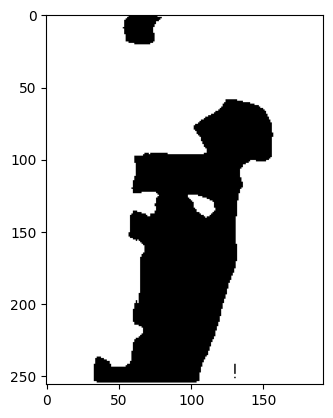

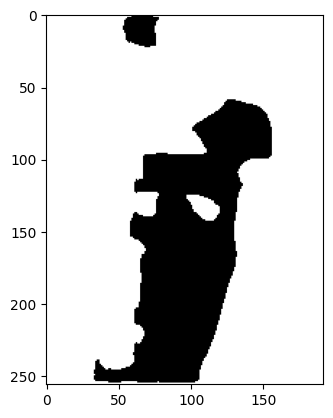

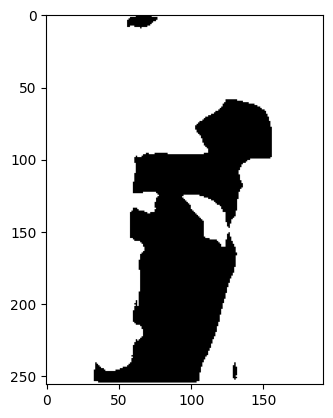

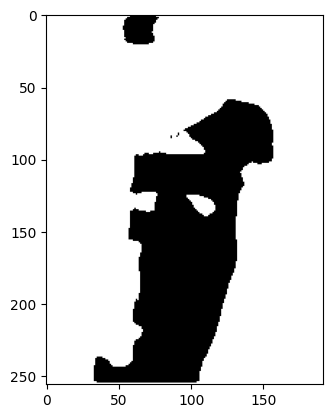

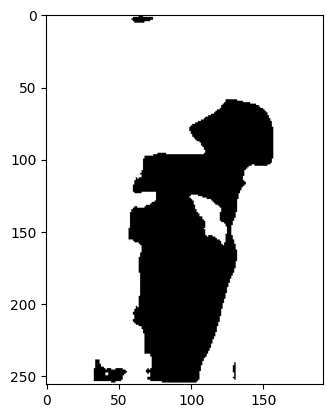

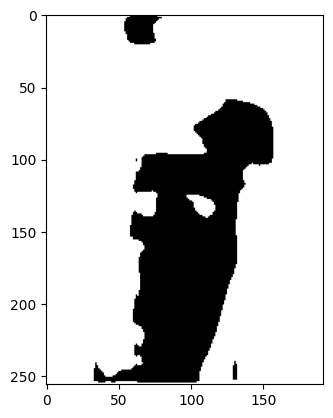

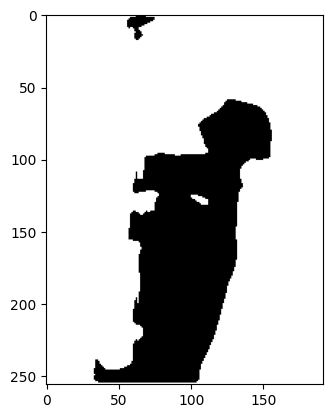

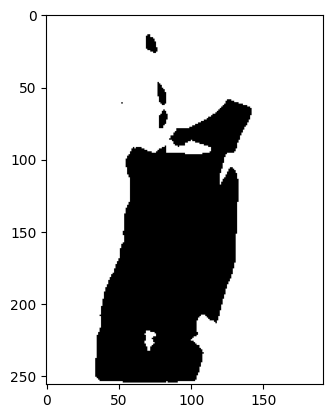

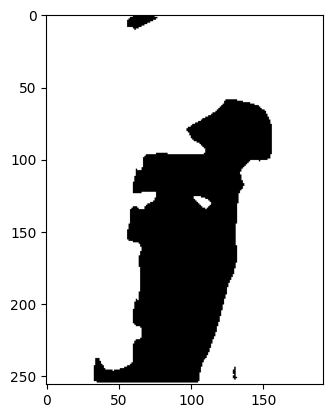

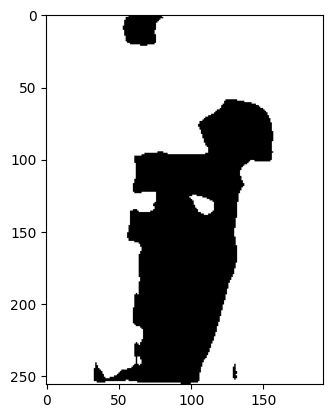

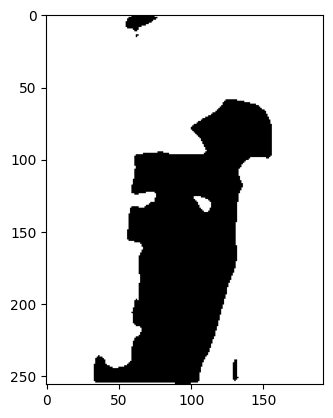

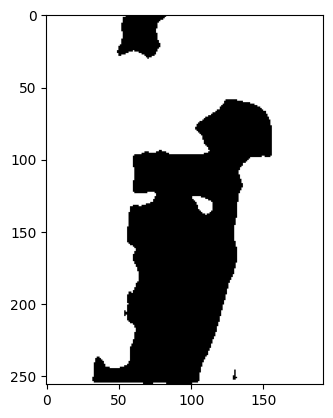

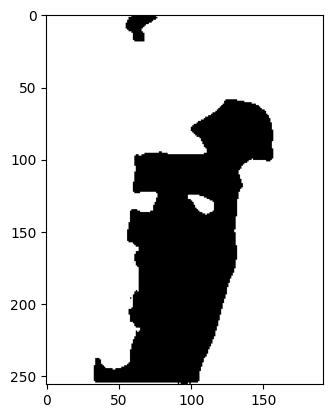

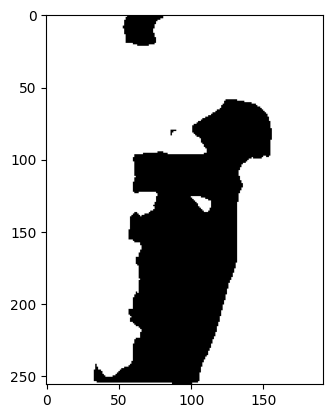

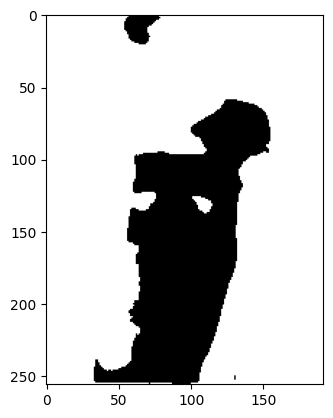

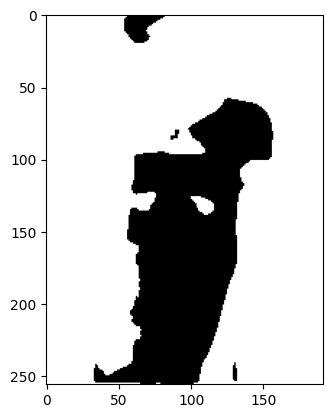

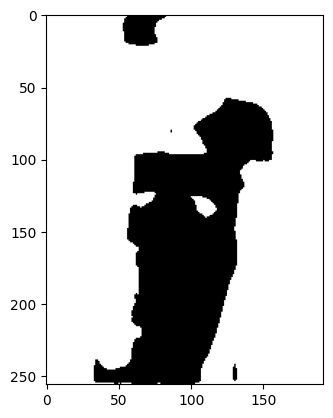

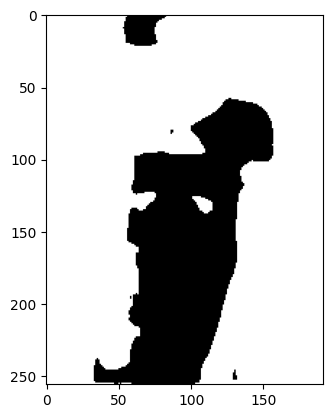

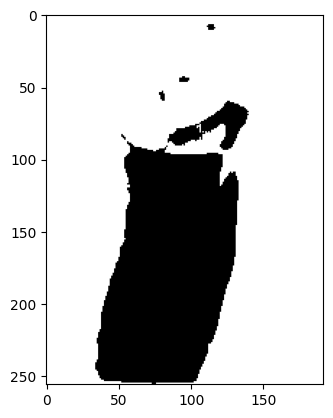

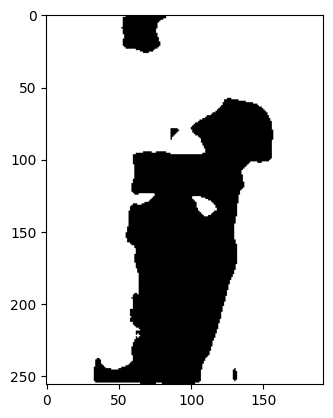

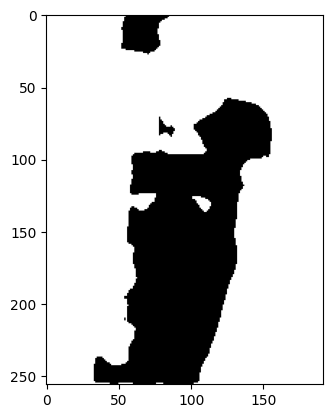

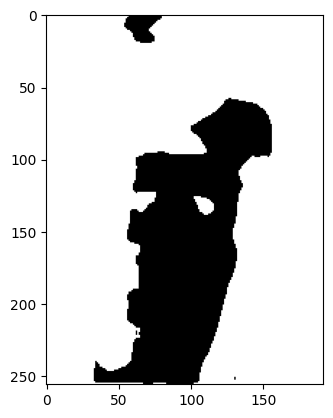

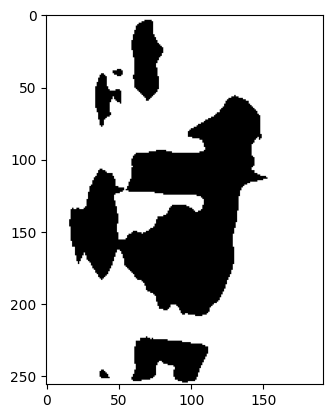

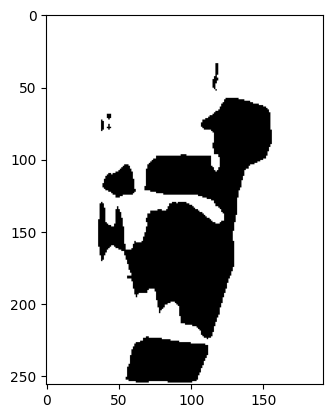

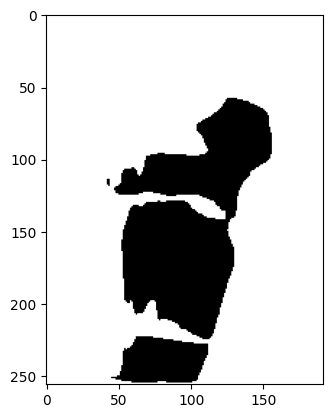

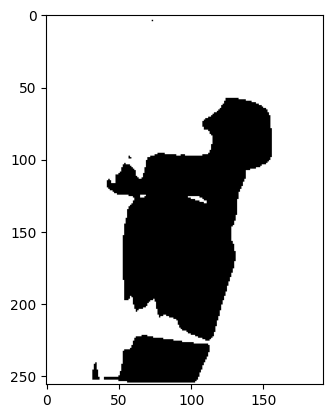

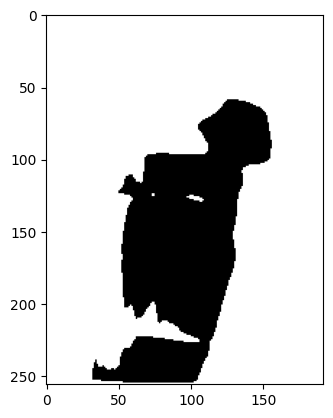

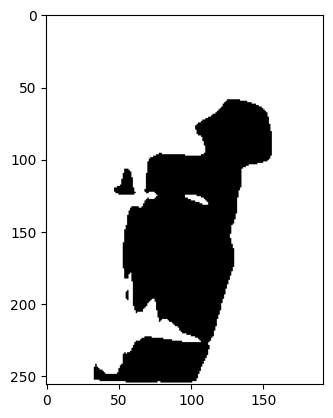

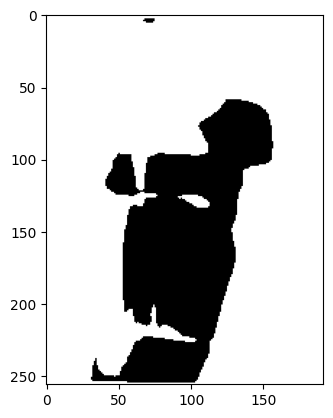

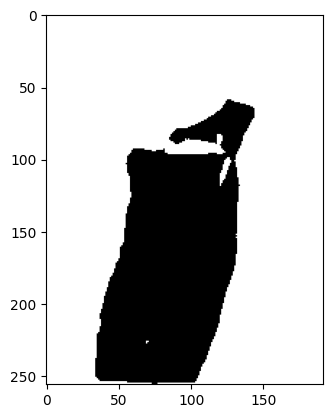

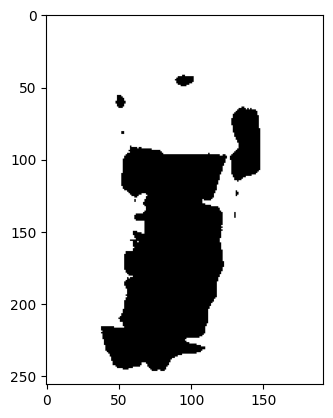

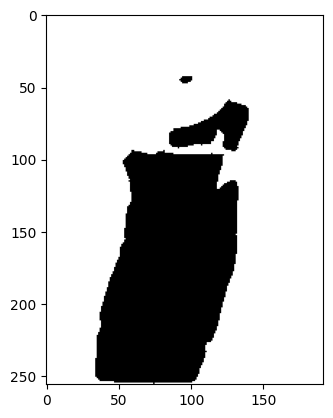

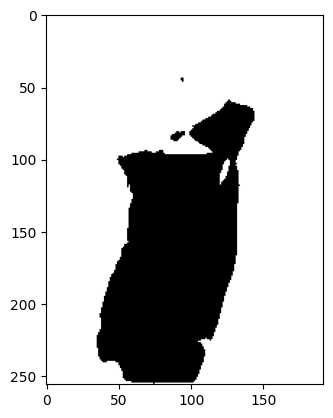

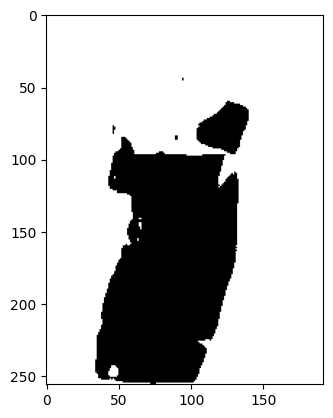

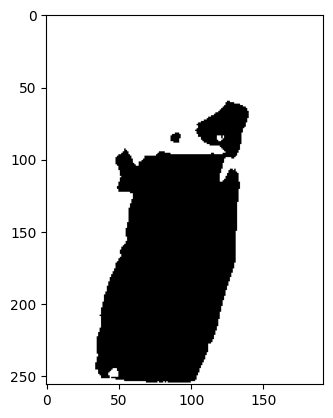

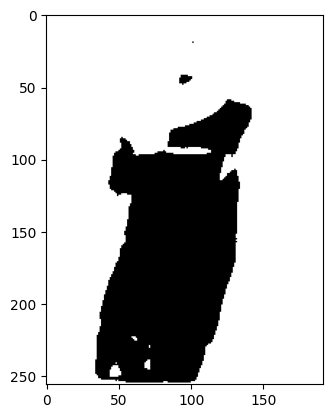

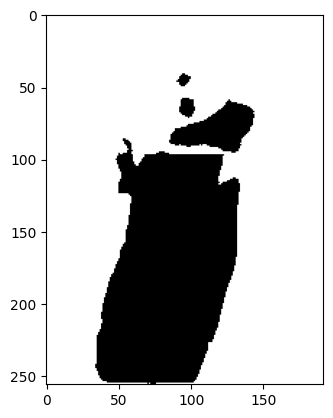

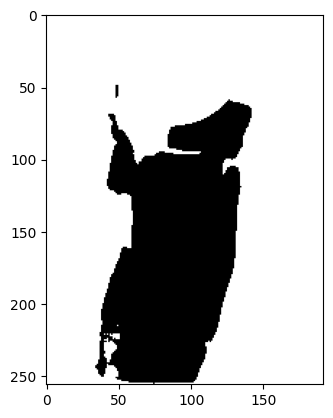

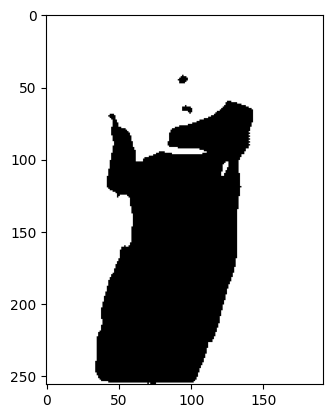

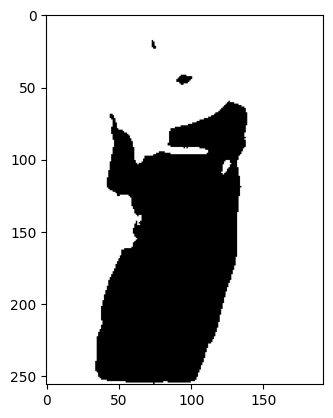

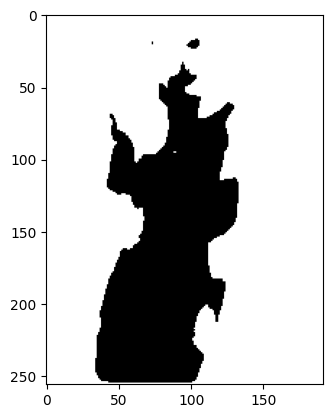

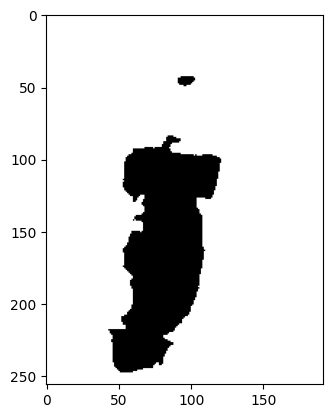

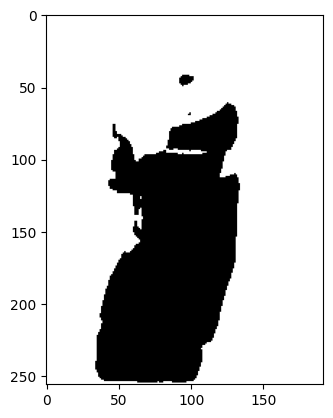

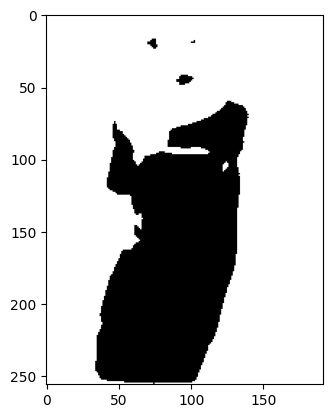

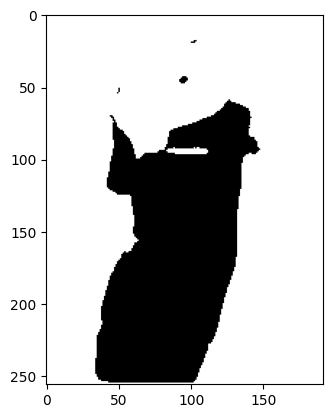

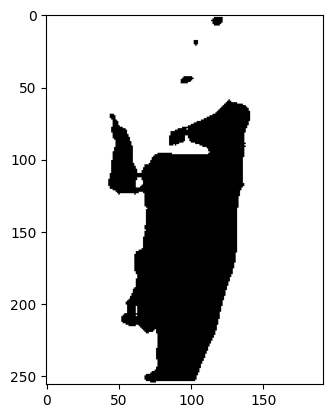

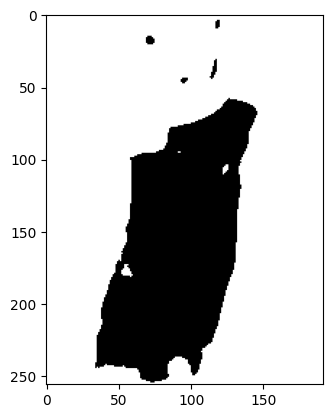

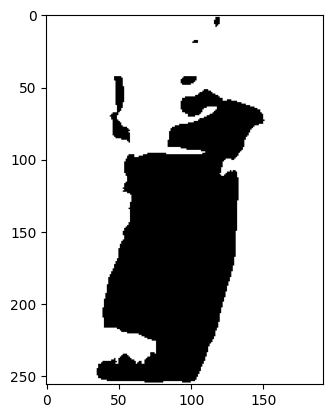

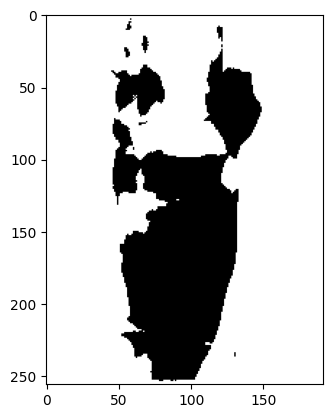

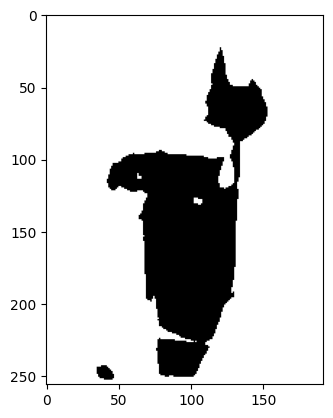

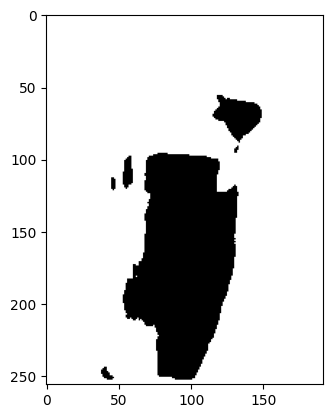

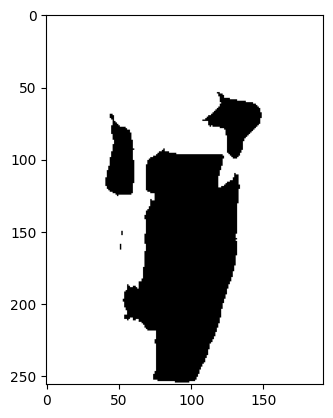

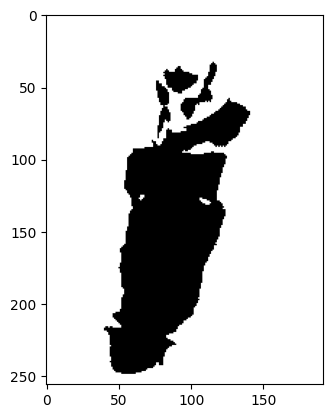

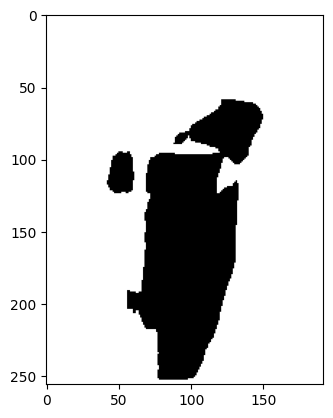

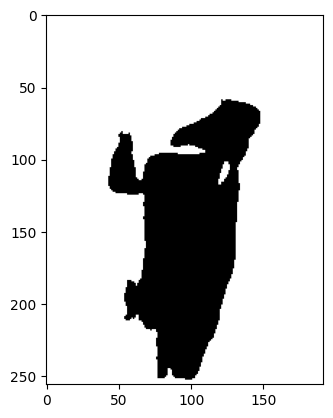

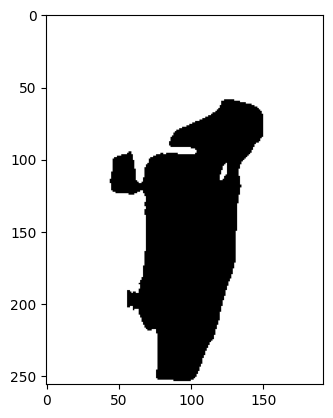

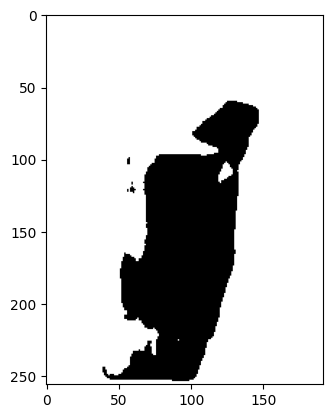

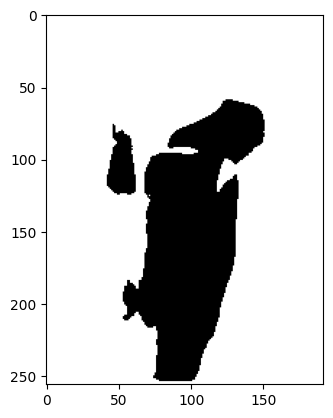

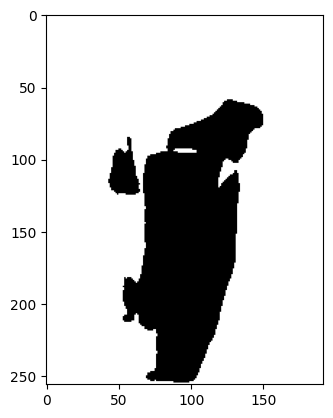

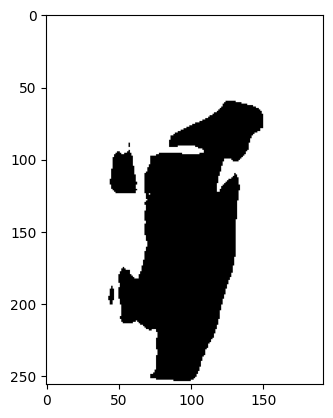

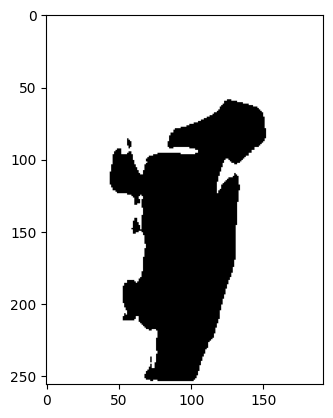

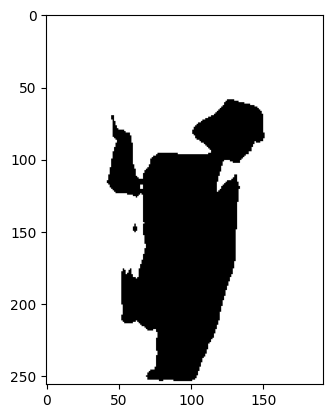

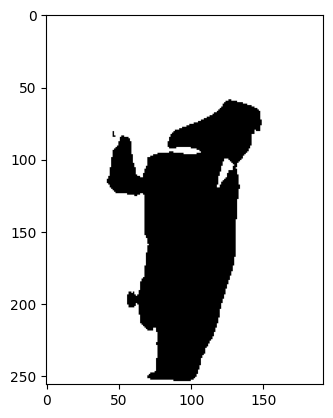

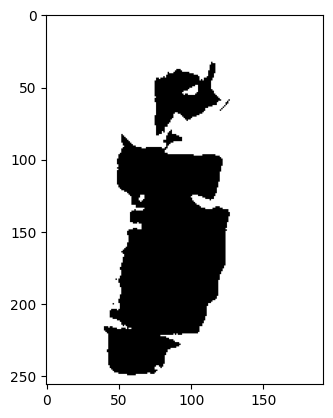

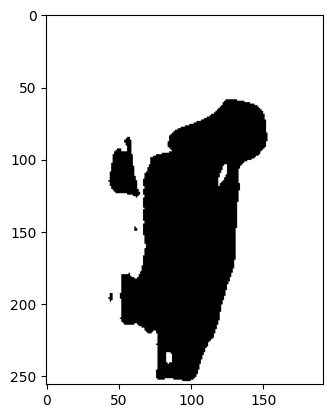

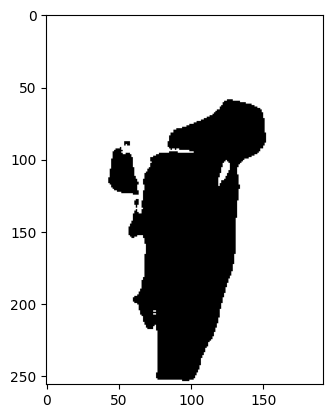

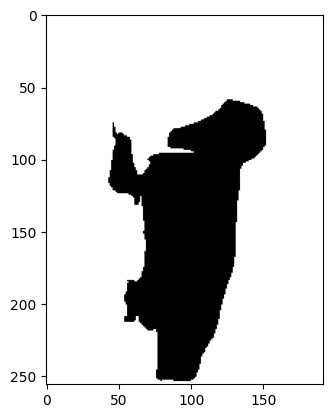

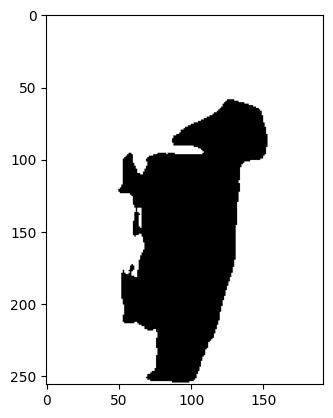

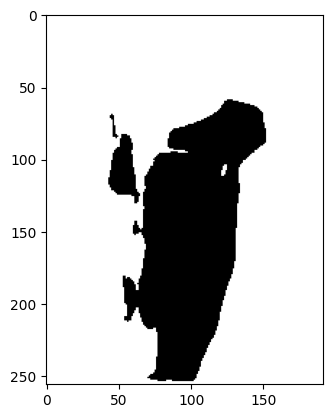

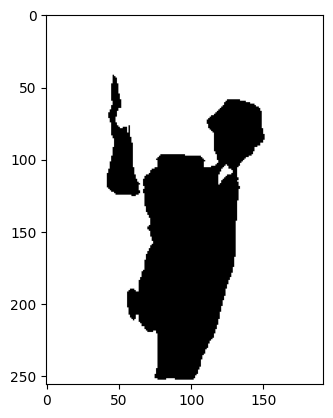

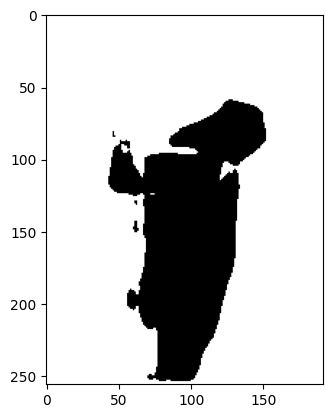

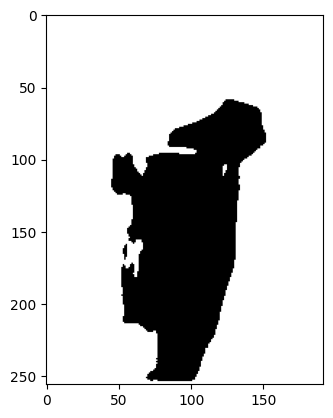

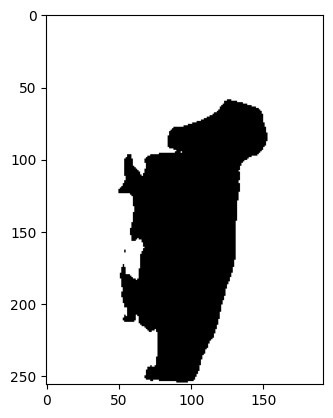

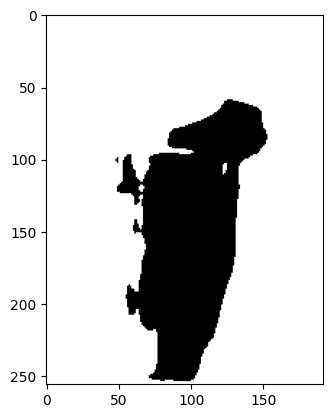

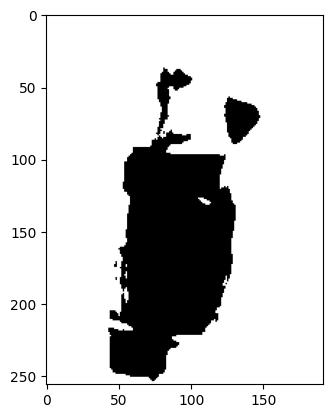

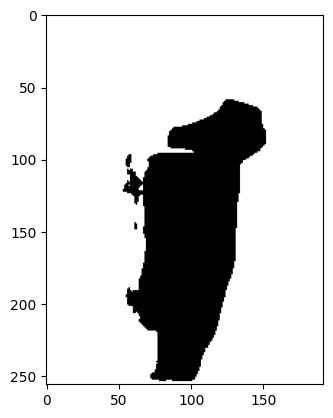

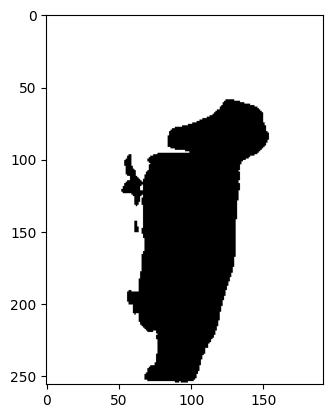

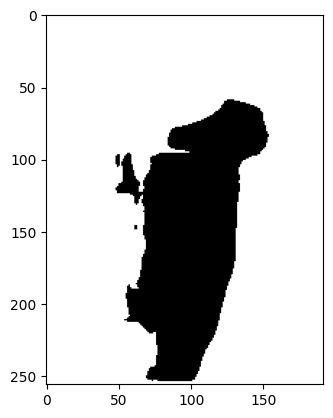

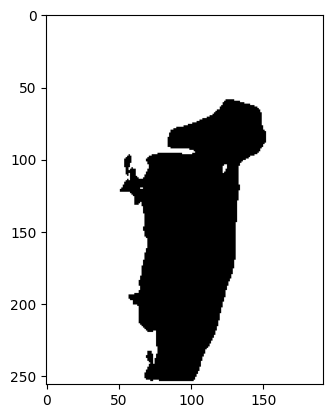

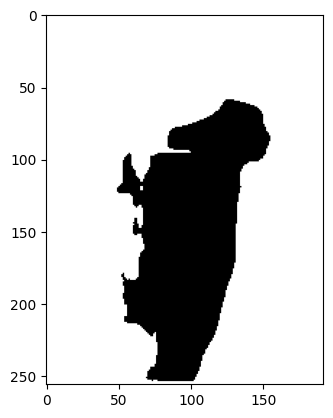

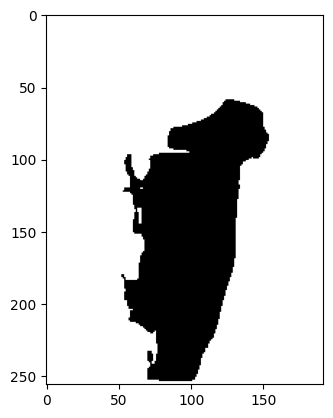

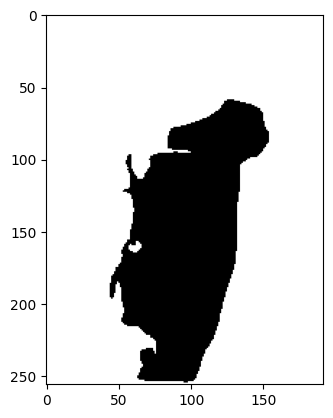

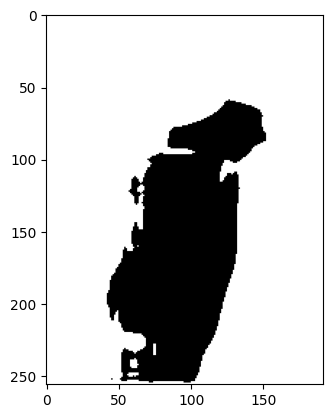

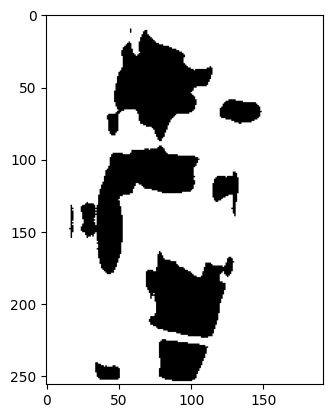

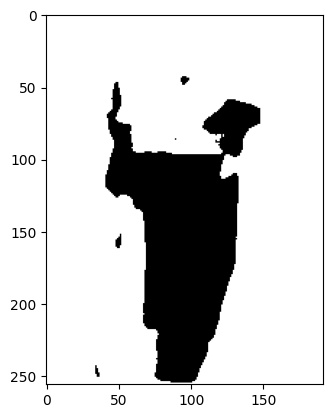

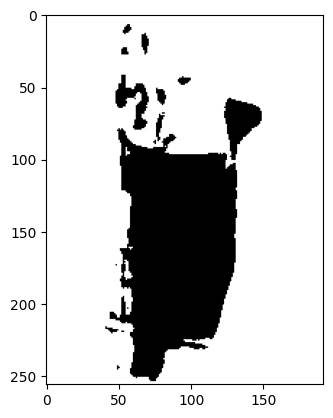

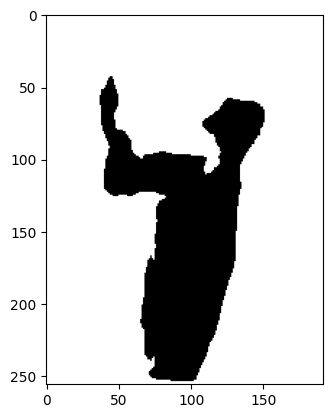

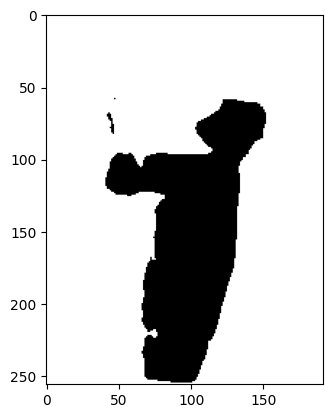

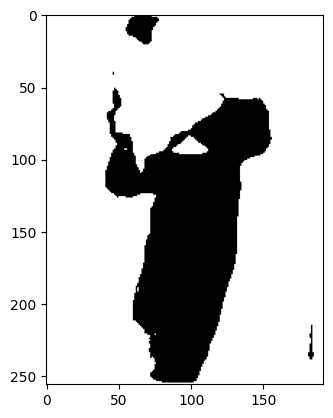

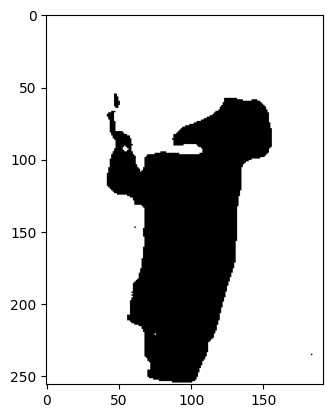

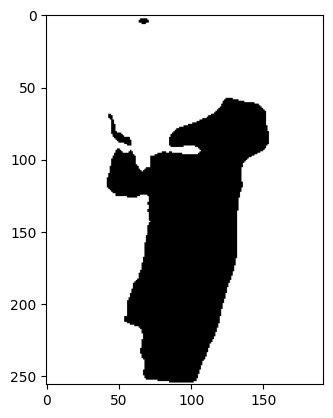

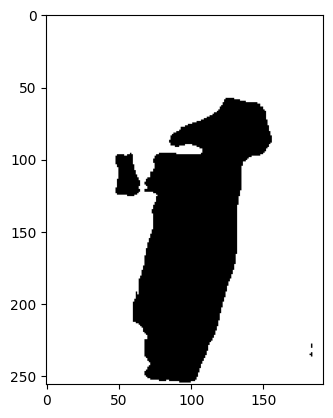

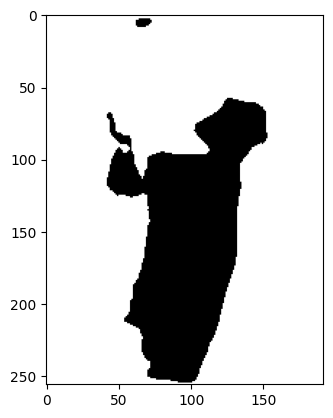

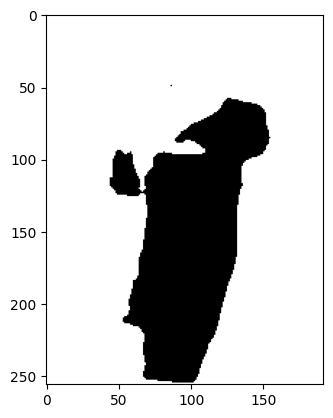

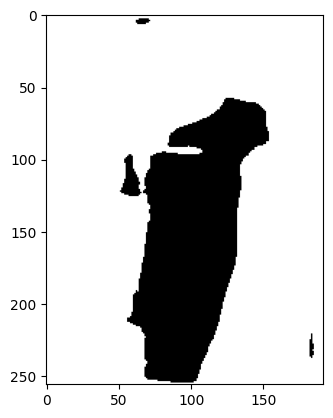

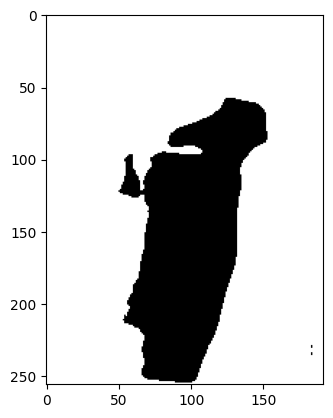

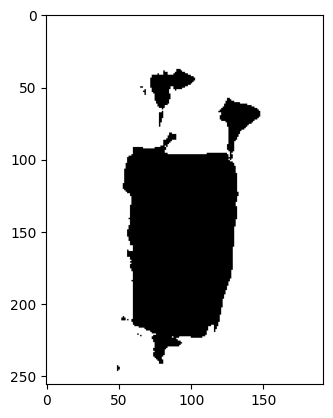

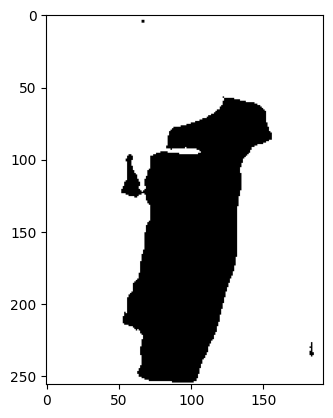

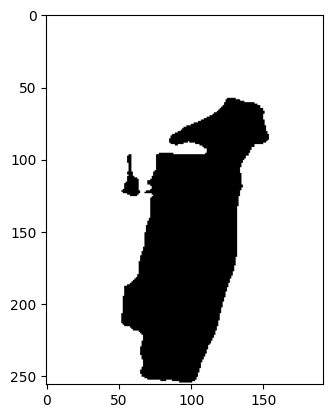

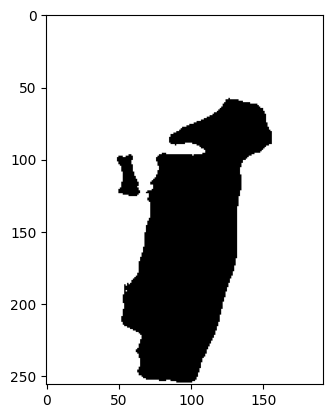

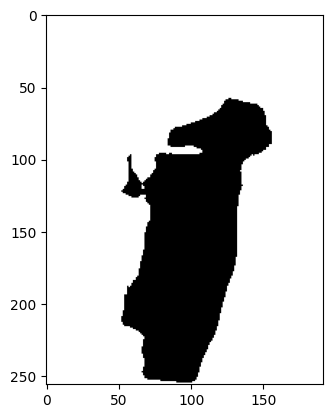

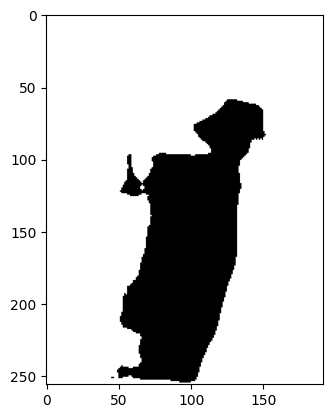

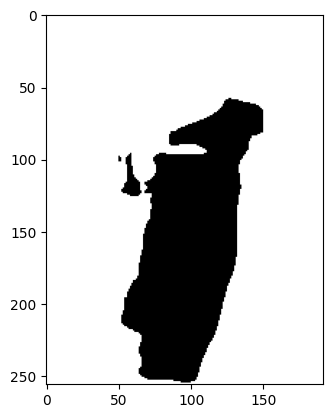

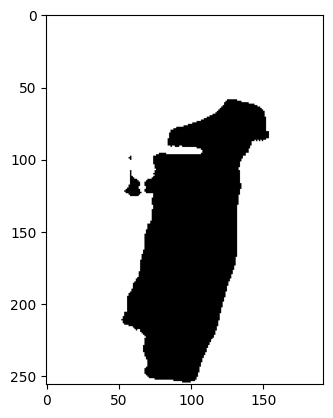

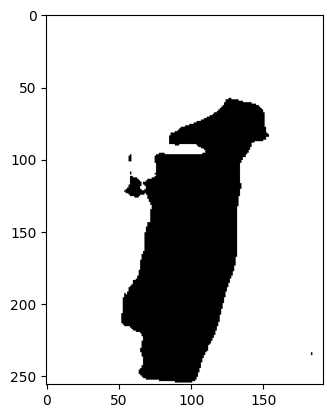

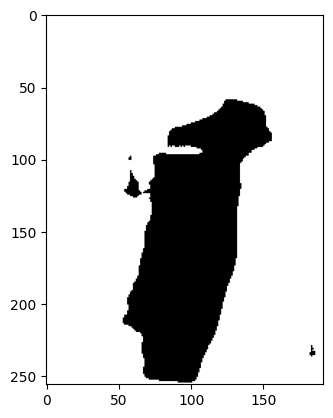

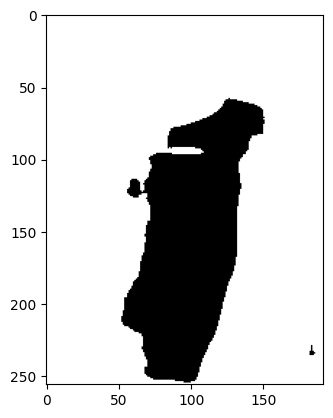

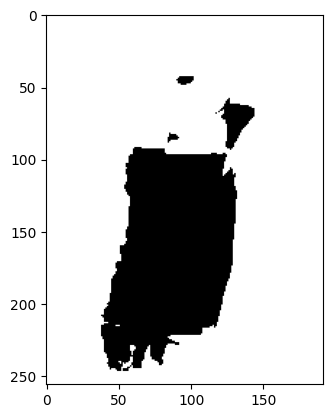

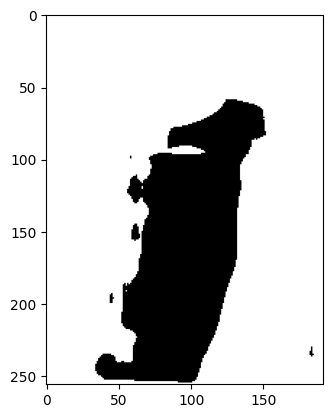

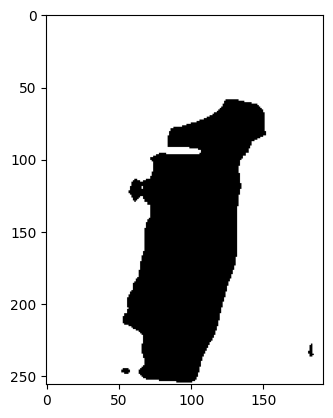

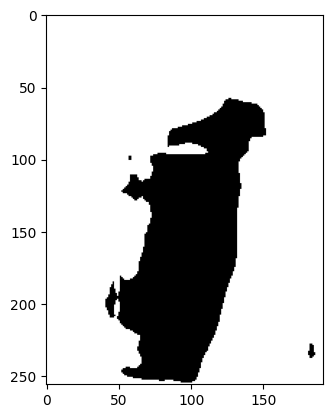

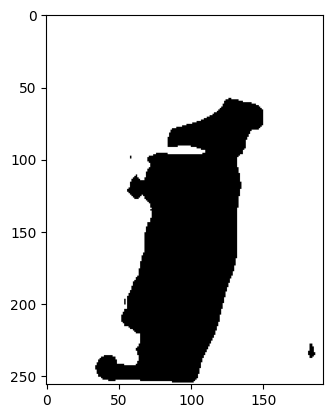

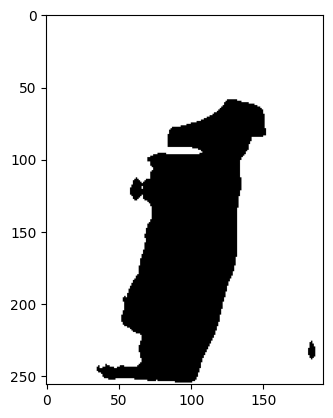

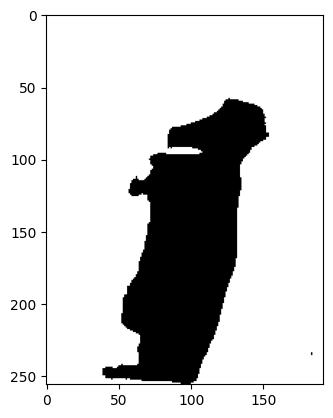

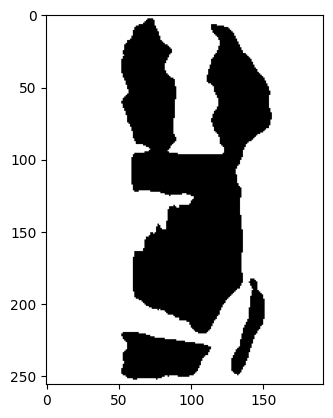

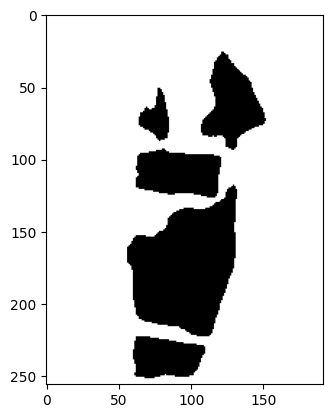

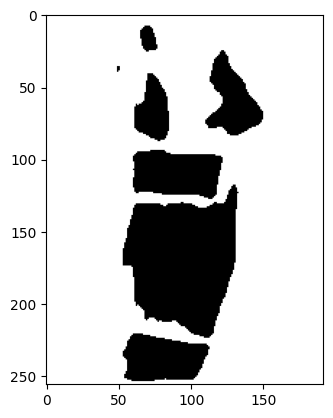

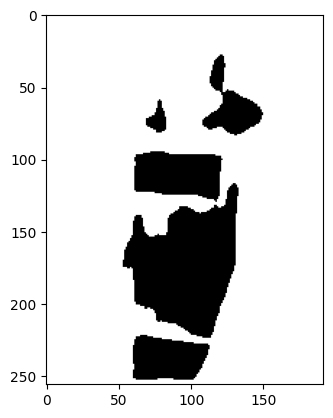

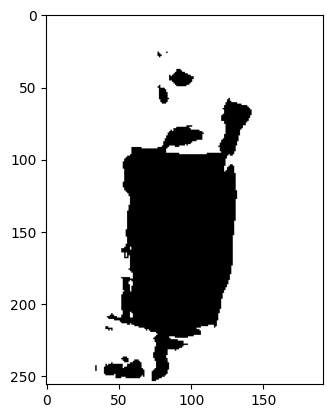

In [5]:
url = r'C:\Users\DenisovDmitrii\Desktop\segmentation_weits\session22'
list_files = os.listdir(url)
for file in list_files:
    model = load_model(model, url + "\\" + file)
    seg = model(img_to_model)

    seg = to_array_from_model_bin_transpose(transform_output(seg.detach()))
    plt.imshow(seg, cmap = 'binary')
    plt.show()

In [6]:
list_files

['unet_epoch_0_0.01666477362041251.pt',
 'unet_epoch_100_0.00026316278407170627.pt',
 'unet_epoch_101_8.151941963629817e-05.pt',
 'unet_epoch_102_8.115626334629423e-05.pt',
 'unet_epoch_103_8.306369693593174e-05.pt',
 'unet_epoch_104_0.0001145233556938257.pt',
 'unet_epoch_105_8.029478321678669e-05.pt',
 'unet_epoch_106_7.159004900840646e-05.pt',
 'unet_epoch_107_9.606848160636495e-05.pt',
 'unet_epoch_108_0.00010659532159032528.pt',
 'unet_epoch_109_9.804756218650486e-05.pt',
 'unet_epoch_10_0.00032975952033944015.pt',
 'unet_epoch_110_8.370023044212219e-05.pt',
 'unet_epoch_111_0.00010840646351132788.pt',
 'unet_epoch_112_7.02918645270922e-05.pt',
 'unet_epoch_113_7.748946178500034e-05.pt',
 'unet_epoch_114_8.798724495860925e-05.pt',
 'unet_epoch_115_8.44518149856952e-05.pt',
 'unet_epoch_116_0.00011161968833776126.pt',
 'unet_epoch_117_0.00012034714153110222.pt',
 'unet_epoch_118_0.000113823953148636.pt',
 'unet_epoch_119_0.00010351996691928959.pt',
 'unet_epoch_11_0.000357791307563